In [80]:
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import argparse
from sklearn.preprocessing import StandardScaler

In [81]:
import csv
import numpy as np

dia, eda, sys, res = [], [], [], []
y_dia, y_eda, y_sys, y_res = [], [], [], []



with open('Project2Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        list = None
        list = (row[3::])
        list = np.array([float(i) for i in list])
        mean, var, min, max = np.mean(list), np.var(list), np.min(list), np.max(list)
        list = [mean, var, min, max]
        #print(mean, var, min, max)
        
        if row[1] == "BP Dia_mmHg":
            dia.append(list)
            y_dia.append(row[2])
        if row[1] == "EDA_microsiemens":
            eda.append(list)
            y_eda.append(row[2])
        if row[1] == "LA Systolic BP_mmHg":
            sys.append(list)
            y_sys.append(row[2])
        if row[1] == "Respiration Rate_BPM":
            res.append(list)
            y_res.append(row[2])
        
        #line_count += 1
        #if line_count > 24:
        #    break



In [3]:
print(dia)
print(eda)
print(sys)
print(res)

print(y_dia)
print(y_eda)
print(y_sys)
print(y_res)

[[37.45749990523893, 18.317189967759113, 30.1804, 46.2806], [48.864006944595616, 336.893837353288, 0.0, 80.9625], [103.00501420245219, 63.058862816431905, 0.0, 121.464], [64.78723746820677, 38.33643629394502, 0.0, 82.7646], [74.74133326714586, 1.9943923329495281, 72.0597, 77.4346], [66.83048640645586, 15.314812888443013, 55.0487, 73.1524], [106.10668232249716, 5.797876354426311, 102.14, 112.391], [71.52673730255164, 1058.4968497754166, 0.0, 131.622], [88.38580322133703, 2.8506973887876863, 85.1827, 92.6272], [82.14120817428187, 23.026747977219035, 67.7827, 92.2136], [99.7850777665374, 51.17497743439243, 0.0, 117.531], [118.16978600288634, 3598.8302473667254, 0.0, 161.341], [87.12869410571277, 6.4003302718506445, 83.2625, 94.1338], [106.16499636629757, 91.09666641892555, 0.0, 119.422], [74.51866511873699, 7.814748757127583, 68.2553, 81.49], [76.56357346882089, 6.61867917272556, 73.6615, 81.9331], [68.51336615368761, 21.783246701238753, 59.0383, 77.561], [55.41438035039038, 91.3676220964

In [82]:
all, y_all = [], []
all.append(dia)
all.append(eda)
all.append(sys)
all.append(res)
y_all.append(y_dia)
y_all.append(y_eda)
y_all.append(y_sys)
y_all.append(y_res)

all, y_all = np.array(all), np.array(y_all)
all, y_all = np.reshape(all, (480,4)), np.reshape(y_all, (480))

dia, y_dia = np.array(dia), np.array(y_dia)
eda, y_eda = np.array(eda), np.array(y_eda)
sys, y_sys = np.array(sys), np.array(y_sys)
res, y_res = np.array(res), np.array(y_res)

print(dia.shape, y_dia.shape)
print(eda.shape, y_eda.shape)
print(sys.shape, y_sys.shape)
print(res.shape, y_res.shape)
print(all.shape, y_all.shape)

(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(120, 4) (120,)
(480, 4) (480,)


In [99]:
#normalization
X = dia / np.linalg.norm(dia)
y = y_dia

In [100]:
def SVM ():
  #clf = svm.SVC()
  #lf = GaussianNB()
  clf = RandomForestClassifier()
  #clf = DecisionTreeClassifier()
  pred=[]
  test_indices=[]
  #10-fold cross validation
  kf = KFold(n_splits=10, shuffle=True)
  for i, (train_index, test_index) in enumerate(kf.split(X)):
    #train classifier
    clf.fit(X[train_index], y[train_index])
    #get predictions and save
    pred.append(clf.predict(X[test_index]))
    #save current test index
    test_indices.append(test_index)
  return pred, test_indices, y

In [101]:
def PrintEvalMetrics(pred, indices, y):
#manually merge predictions and testing labels from each of the folds to make confusion matrix
  finalPredictions = []
  groundTruth = []
  for p in pred:
    finalPredictions.extend(p)
  for i in indices:
    groundTruth.extend(y[i])
  cm = confusion_matrix(groundTruth, finalPredictions)
  p = precision_score(groundTruth, finalPredictions, average='macro')
  r = recall_score(groundTruth, finalPredictions, average='macro')
  a = accuracy_score(groundTruth, finalPredictions)

  return cm, p, r, a

In [29]:
pred, test_indices, y = SVM()
matrix, pres, recall, acc = PrintEvalMetrics(pred, test_indices, y)

Precision:  0.5417710944026733
Recall:  0.5416666666666667
Accuracy:  0.5416666666666666


Precision:  0.6602274569540795
Recall:  0.6602274569540795
Accuracy:  0.66


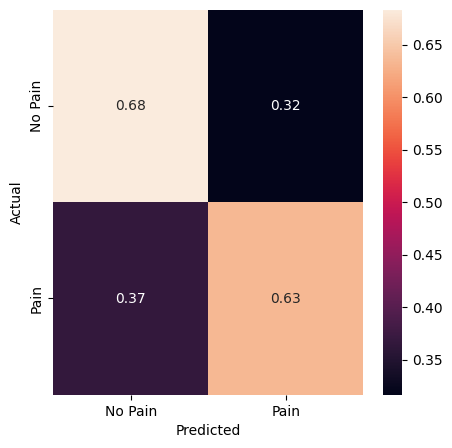

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

hash = ["No Pain", "Pain" ]


exp = 10
matrix, avg_precision, avg_recall, avg_accuracy = [], [], [], []
for test in range(0,10):
    pred, test_indices, y = SVM()
    cm, prec, rec, acc = PrintEvalMetrics(pred, test_indices, y)
    #print(test)
    matrix.append(cm)
    avg_precision.append(prec)
    avg_recall.append(prec)
    avg_accuracy.append(acc)

matrix = np.array(matrix)
matrix = matrix.mean(0)

avg_precision = np.array(avg_precision)
avg_precision = avg_precision.mean(0)

avg_recall = np.array(avg_recall)
avg_recall = avg_recall.mean(0)

avg_accuracy = np.array(avg_accuracy)
avg_accuracy = avg_accuracy.mean(0)

print("Precision: ", avg_precision)
print("Recall: ", avg_recall)
print("Accuracy: " , avg_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= hash)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=hash, yticklabels=hash)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

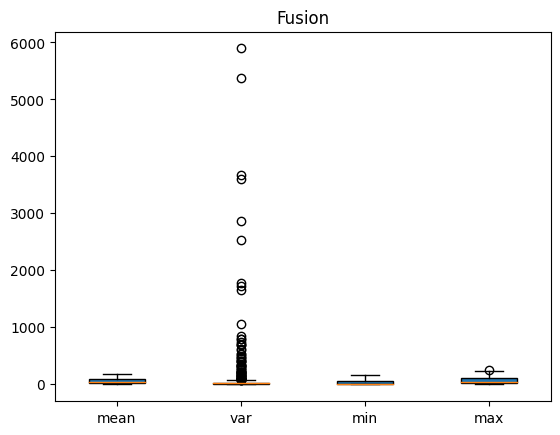

In [114]:
labels = ['mean', 'var', 'min', 'max']
plt.boxplot(all, vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)

plt.title("Fusion")
plt.show()

In [131]:
graph = []

signals = ["BP Dia_mmHg", "EDA_microsiemens", "LA Systolic BP_mmHg", "Respiration Rate_BPM"]

with open('Project2Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        list = None
        list = (row[3::])
        list = np.array([float(i) for i in list])
        #list = list / np.linalg.norm(list)
        graph.append(list)
        
        line_count += 1
        if line_count > 7:
            break

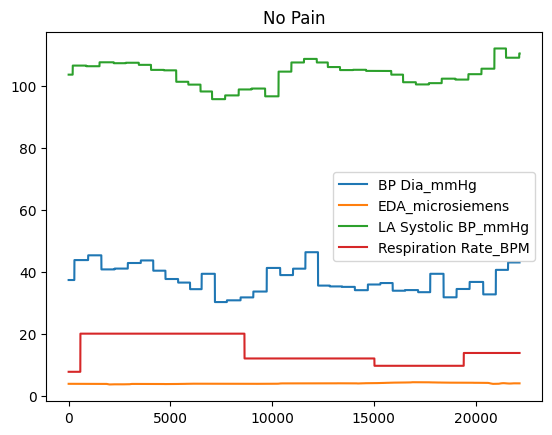

In [132]:
plt.title("No Pain")
plt.plot(graph[0], label = "BP Dia_mmHg")
plt.plot(graph[1], label = "EDA_microsiemens")
plt.plot(graph[2], label = "LA Systolic BP_mmHg")
plt.plot(graph[3], label = "Respiration Rate_BPM")
plt.legend()
plt.show()

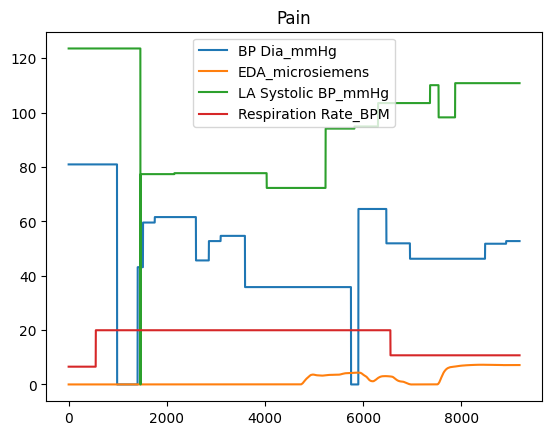

In [134]:
plt.title("Pain")
plt.plot(graph[4], label = "BP Dia_mmHg")
plt.plot(graph[5], label = "EDA_microsiemens")
plt.plot(graph[6], label = "LA Systolic BP_mmHg")
plt.plot(graph[7], label = "Respiration Rate_BPM")
plt.legend()
plt.show()